<a href="https://colab.research.google.com/github/MariamHabshi17/Images-Classification/blob/main/projjj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **libraries**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 # python library to work with images
import os  # to access operational system features
import PIL # to work with vectors and metrices
import tensorflow as tf # to import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers.experimental import preprocessing
from pathlib import Path
import os.path
from tensorflow.keras.models import Sequential

**Linking** **Colab** **with** **MyDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Bottles'

In [ ]:
%cd /content/gdrive/MyDrive/Bottles
#to highlight that we need access to "Project" folder

/content/gdrive/MyDrive/Bottles


In [ ]:
!ls #to know the contents

'Bottle Images'


first method to show images
## Using cv2

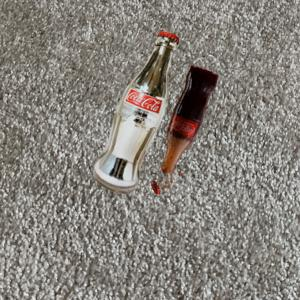

In [ ]:
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/gdrive/MyDrive/Bottles/Bottle Images/Soda Bottle/00000600.jpg')
cv2_imshow(img)

# Create data directory

In [ ]:
data_dir="/content/gdrive/MyDrive/Bottles/Bottle Images" #where to download data so this will be the current directory.

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5] #path for first 5 elements

[PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Soda Bottle/00000627.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Soda Bottle/00001803.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Soda Bottle/00000783.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Soda Bottle/00001548.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Soda Bottle/00001894.jpg')]

In [ ]:
#How many image we have?
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6013


# list for each class

In [ ]:
Bottle_Images_dict = {
    'Plastic Bottle': list(data_dir.glob('Plastic Bottles/*')),
    'Soda Bottle': list(data_dir.glob('Soda Bottle/*')),
    'Water Bottle': list(data_dir.glob('Water Bottle/*')),
}

#for category, images in Bottle_Images_dict.items():
   # selected_images = images[:250]
    # Do something with the selected images

# Rows labels for each class

In [ ]:
Bottle_labels_dict = {
    'Plastic Bottle': 0,
    'Soda Bottle': 1,
    'Water Bottle': 2
}
#to get path

In [ ]:
Bottle_Images_dict['Water Bottle'][:5] #show the path for first 5 images in "Beer" Folder

[PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Water Bottle/00000769.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Water Bottle/00001153.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Water Bottle/00001361.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Water Bottle/00001793.jpg'),
 PosixPath('/content/gdrive/MyDrive/Bottles/Bottle Images/Water Bottle/00000710.jpg')]

In [ ]:
X, y = [], []

for Bottle_name, images in Bottle_Images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(Bottle_labels_dict[Bottle_name])

In [ ]:
X = np.array(X)
y= np.array(y)

In [ ]:
X.shape

(4012, 180, 180, 3)

#Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#default splitting 0.25

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Create Model

In [ ]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
95/95 [==============================] - 94s 978ms/step - loss: 0.7445 - accuracy: 0.5487
Epoch 2/10
95/95 [==============================] - 94s 986ms/step - loss: 0.5227 - accuracy: 0.7504
Epoch 3/10
95/95 [==============================] - 97s 1s/step - loss: 0.4165 - accuracy: 0.8102
Epoch 4/10
95/95 [==============================] - 94s 987ms/step - loss: 0.3286 - accuracy: 0.8644
Epoch 5/10
95/95 [==============================] - 92s 960ms/step - loss: 0.2189 - accuracy: 0.9126
Epoch 6/10
95/95 [==============================] - 94s 991ms/step - loss: 0.1589 - accuracy: 0.9432
Epoch 7/10
95/95 [==============================] - 91s 958ms/step - loss: 0.1502 - accuracy: 0.9478
Epoch 8/10
95/95 [==============================] - 93s 981ms/step - loss: 0.0940 - accuracy: 0.9678
Epoch 9/10
95/95 [==============================] - 96s 1s/step - loss: 0.0578 - accuracy: 0.9824
Epoch 10/10
95/95 [==============================] - 98s 1s/step - loss: 0.0875 - accuracy: 0.968

In [ ]:
model.evaluate(X_test_scaled,y_test)

32/32 [==============================] - 10s 292ms/step - loss: 0.3433 - accuracy: 0.8973


[0.3433075249195099, 0.8973080515861511]

In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
95/95 [==============================] - 94s 988ms/step - loss: 14.2747 - accuracy: 0.5131
Epoch 2/10
95/95 [==============================] - 91s 959ms/step - loss: 0.8791 - accuracy: 0.5005
Epoch 3/10
95/95 [==============================] - 89s 940ms/step - loss: 0.8191 - accuracy: 0.5005
Epoch 4/10
95/95 [==============================] - 92s 974ms/step - loss: 0.7842 - accuracy: 0.4925
Epoch 5/10
95/95 [==============================] - 90s 943ms/step - loss: 0.7620 - accuracy: 0.4925
Epoch 6/10
95/95 [==============================] - 92s 966ms/step - loss: 0.7474 - accuracy: 0.5018
Epoch 7/10
95/95 [==============================] - 98s 1s/step - loss: 0.7372 - accuracy: 0.4975
Epoch 8/10
95/95 [==============================] - 91s 958ms/step - loss: 0.7300 - accuracy: 0.4958
Epoch 9/10
95/95 [==============================] - 91s 957ms/step - loss: 0.7245 - accuracy: 0.4945
Epoch 10/10
95/95 [==============================] - 91s 953ms/step - loss: 0.7203 - accuracy

In [ ]:
model.evaluate(X_test_scaled,y_test)

32/32 [==============================] - 10s 323ms/step - loss: 0.7184 - accuracy: 0.4935


[0.7184038758277893, 0.49351945519447327]